# Check up the Statistic of CUB Caption

In [1]:
import os
from glob import glob
from tqdm import tqdm
from collections import Counter
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt

## 1. Data loading

In [2]:
# Origin path
orig_dir_path = ".\\text_c10"
orig_text_path = ".\\text_c10\\*\\*.txt"
orig_dir_list = os.listdir(orig_dir_path)
orig_text_list = glob(orig_text_path)
pprint.pprint(orig_dir_list[:5])
pprint.pprint(orig_text_list[:5])

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet']
['.\\text_c10\\001.Black_footed_Albatross\\Black_Footed_Albatross_0001_796111.txt',
 '.\\text_c10\\001.Black_footed_Albatross\\Black_Footed_Albatross_0002_55.txt',
 '.\\text_c10\\001.Black_footed_Albatross\\Black_Footed_Albatross_0003_796136.txt',
 '.\\text_c10\\001.Black_footed_Albatross\\Black_Footed_Albatross_0005_796090.txt',
 '.\\text_c10\\001.Black_footed_Albatross\\Black_Footed_Albatross_0006_796065.txt']


In [3]:
# Converted file path
convert_dir_path = ".\\text_c10_convert"

convert_dir_list = [os.path.join(convert_dir_path, p ) for p in orig_dir_list]
convert_text_list = [ os.path.join(
                                    os.path.join(
                                        os.path.join(p.split(os.sep)[0], p.split(os.sep)[1] + '_convert')
                                    ), 
                      os.path.join(p.split(os.sep)[2], p.split(os.sep)[3])) for p in orig_text_list] 
pprint.pprint(convert_dir_list[:5])
pprint.pprint(convert_text_list[:5])

['.\\text_c10_convert\\001.Black_footed_Albatross',
 '.\\text_c10_convert\\002.Laysan_Albatross',
 '.\\text_c10_convert\\003.Sooty_Albatross',
 '.\\text_c10_convert\\004.Groove_billed_Ani',
 '.\\text_c10_convert\\005.Crested_Auklet']
['.\\text_c10_convert\\001.Black_footed_Albatross\\Black_Footed_Albatross_0001_796111.txt',
 '.\\text_c10_convert\\001.Black_footed_Albatross\\Black_Footed_Albatross_0002_55.txt',
 '.\\text_c10_convert\\001.Black_footed_Albatross\\Black_Footed_Albatross_0003_796136.txt',
 '.\\text_c10_convert\\001.Black_footed_Albatross\\Black_Footed_Albatross_0005_796090.txt',
 '.\\text_c10_convert\\001.Black_footed_Albatross\\Black_Footed_Albatross_0006_796065.txt']


In [4]:
path_len = {}
for path in tqdm(convert_text_list, desc='processing'):
    with open(path, 'r') as f:
        file = f.readlines()
        path_len[path]=[len(file[i].split("|")) for i in range(len(file))]

processing: 100%|███████████████████████████████████████████████████████████████| 11788/11788 [00:17<00:00, 679.24it/s]


In [5]:
all_path_len = []
for path in tqdm(convert_text_list, desc='processing'):
    all_path_len.extend(path_len[path])

processing: 100%|███████████████████████████████████████████████████████████| 11788/11788 [00:00<00:00, 1969740.47it/s]


## 2. Check the Statics

In [6]:
len(all_path_len)

117880

In [10]:
count = Counter(all_path_len)

In [12]:
count.items()

dict_items([(20, 5037), (17, 7638), (12, 14196), (22, 3661), (30, 917), (27, 1640), (13, 10634), (14, 9973), (18, 7421), (33, 532), (16, 9806), (10, 1030), (23, 3147), (11, 4635), (28, 1438), (15, 12871), (24, 2679), (19, 6106), (26, 1998), (9, 388), (25, 2316), (43, 76), (41, 125), (21, 4343), (45, 60), (48, 41), (29, 1147), (35, 374), (36, 304), (38, 195), (7, 69), (37, 273), (31, 757), (32, 643), (34, 477), (40, 127), (39, 163), (42, 97), (49, 37), (61, 8), (50, 18), (8, 154), (6, 38), (44, 74), (54, 13), (58, 11), (51, 18), (46, 50), (5, 6), (57, 8), (53, 12), (56, 7), (68, 3), (59, 5), (62, 4), (47, 38), (55, 7), (1, 2), (72, 1), (52, 14), (65, 1), (64, 1), (63, 2), (74, 3), (60, 3), (67, 2), (66, 1), (78, 1), (75, 1), (3, 1), (71, 1), (77, 1)])

In [15]:
prop = pd.DataFrame(count.values(), index=count.keys())
prop = prop.sort_index()
prop_p = prop / 117880

<Figure size 2160x720 with 0 Axes>

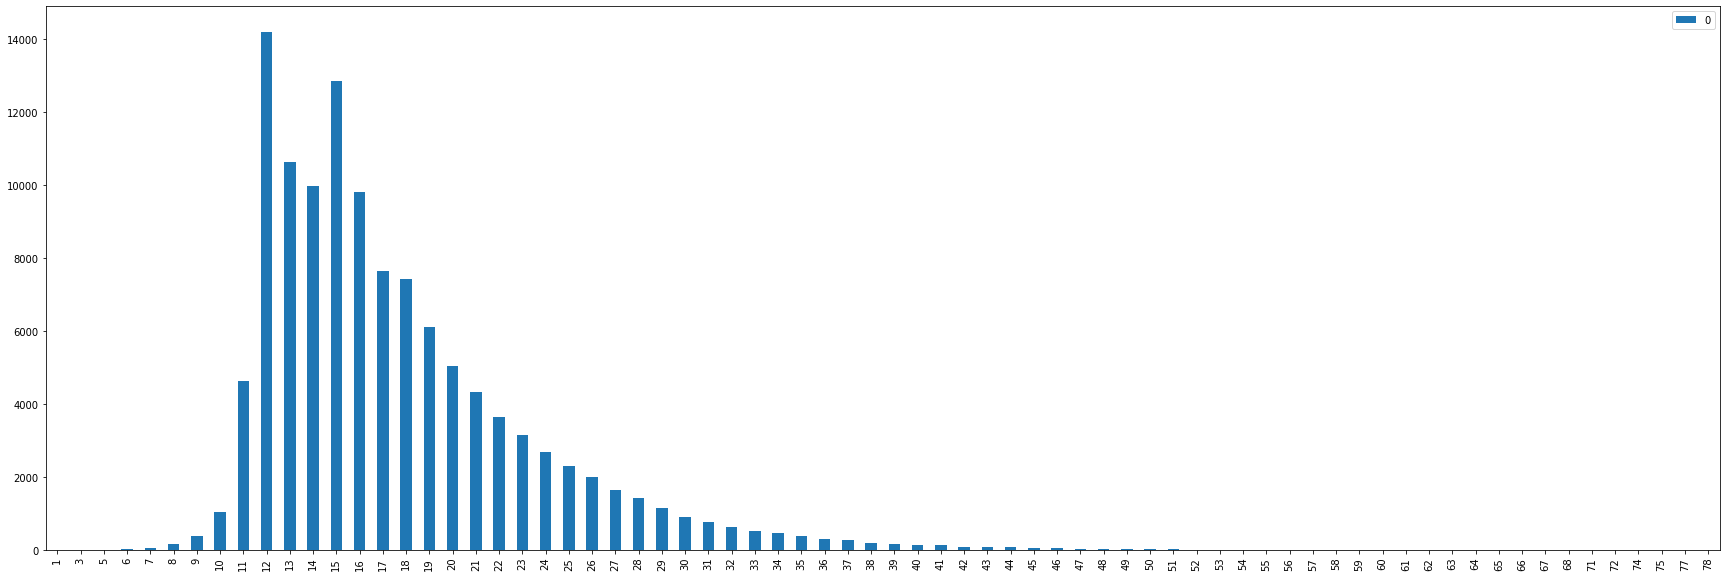

In [17]:
plt.figure(figsize=(30,10))
prop.plot.bar(figsize=(30,10))

<Figure size 2160x720 with 0 Axes>

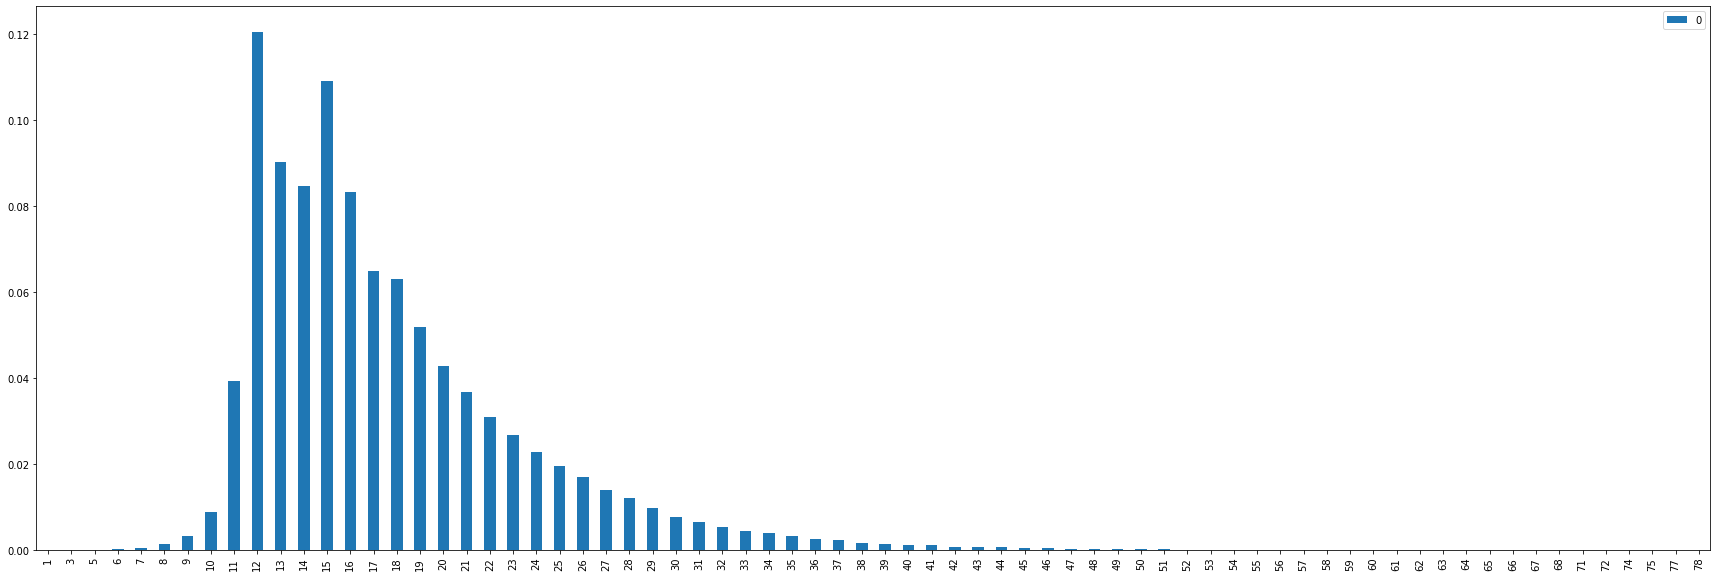

In [18]:
plt.figure(figsize=(30,10))
prop_p.plot.bar(figsize=(30,10))

## Proportion of Wasted Words

In [19]:
n_word_drop = np.array(prop.index[13:] -15)
n_word_drop

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 56, 57, 59, 60, 62, 63], dtype=int64)

In [20]:
n_word_drop_freq = np.array(prop.iloc[13:, :])
n_word_drop_freq = n_word_drop_freq.flatten()
drops = n_word_drop * n_word_drop_freq
drops = sum(drops)
total = sum(prop[0] * prop.index)
100 * (drops / total)

19.658814873245305